# Assignment 8 
## Name: Rohan Chopra
## NetId : rc4920

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
glass.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [4]:

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [5]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household


### Q1 . Try different thresholds for computing predictions using 'Al' column. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall.

In [6]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

# Define thresholds to try
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Evaluate different thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions using the threshold
    predictions = (probs >= threshold).astype(int)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Threshold: 0.30, Accuracy: 0.81, Precision: 0.60, Recall: 0.82
Threshold: 0.40, Accuracy: 0.88, Precision: 0.75, Recall: 0.82
Threshold: 0.50, Accuracy: 0.88, Precision: 0.88, Recall: 0.64
Threshold: 0.60, Accuracy: 0.84, Precision: 0.83, Recall: 0.45
Threshold: 0.70, Accuracy: 0.84, Precision: 1.00, Recall: 0.36


### Q2. Do the same analysis for other columns

In [7]:
#elements
elements = ['RI','Na','Mg','Si','K','Ca','Ba','Fe']
for ele in elements:
    X= np.array(glass[ele]).reshape(-1,1)
    y = glass.household
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Define thresholds to try
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)
        
        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        
        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Element:RI, Threshold: 0.30, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.30, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element:Na, Threshold: 0.40, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element:Na, Threshold: 0.50, Accuracy: 0.86, Precision: 0.86, Recall: 0.55
Element:Na, Threshold: 0.60, Accuracy: 0.81, Precision: 0.80, Recall: 0.36
Element:Na, Threshold: 0.70, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Element:Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.77, Recall: 0.91
Element:Mg, Threshold: 0.40, Accuracy: 0.86, Precision: 0.73, Recall: 0.73
Element:Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.70, Recall: 0.64
Element:Mg, Threshold: 0.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Q3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [11]:
# Drop the target variable from the features
X = glass.drop(columns=['Type', 'household'])

# Target variable
y = glass['household']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9069767441860465


Q4.Plot ROC Curves for each model

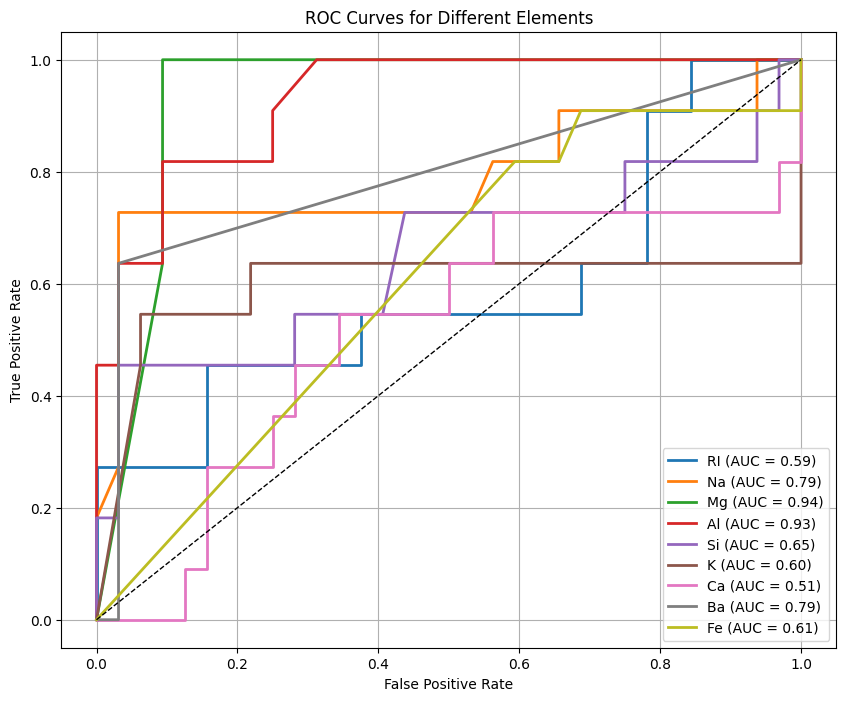

In [13]:
elements = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

plt.figure(figsize=(10, 8))

for ele in elements:
    X = np.array(glass[ele]).reshape(-1, 1)
    y = glass['household']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{ele} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Elements')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Clustering:
Repeat the above exercise for different values of k



K-means Clustering Code with Visualization

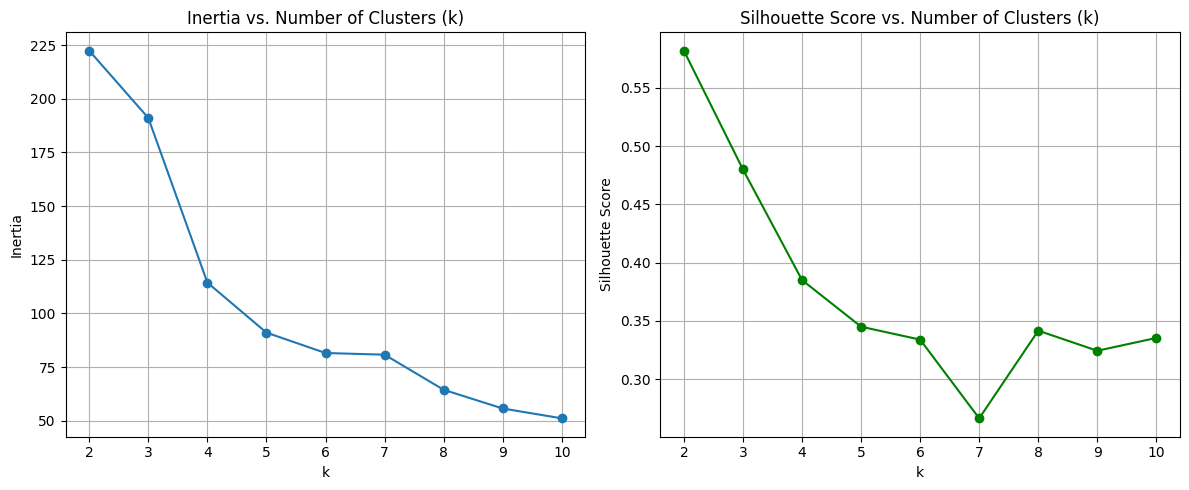

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load sample data (e.g., Iris)
data = load_iris()
X = data.data

# Optional: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of k values
k_values = range(2, 11)
inertia = []
silhouette = []

# Clustering with scaled data
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette.append(score)

# Plot Inertia and Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Inertia vs. Number of Clusters (k)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


Without Scaling (Comparison)

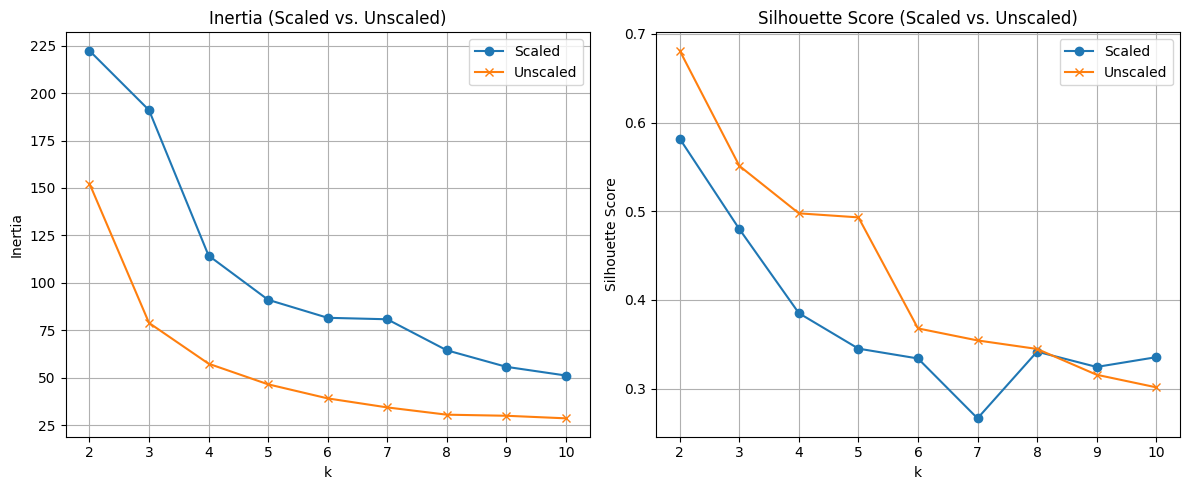

In [15]:
# Repeat clustering WITHOUT scaling
inertia_unscaled = []
silhouette_unscaled = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia_unscaled.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_unscaled.append(score)

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, label='Scaled', marker='o')
plt.plot(k_values, inertia_unscaled, label='Unscaled', marker='x')
plt.title('Inertia (Scaled vs. Unscaled)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, label='Scaled', marker='o')
plt.plot(k_values, silhouette_unscaled, label='Unscaled', marker='x')
plt.title('Silhouette Score (Scaled vs. Unscaled)')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


How Do Inertia and Silhouette Score Change?

Inertia: Inertia consistently decreases as k increases, since adding more clusters reduces the distance between points and their assigned centroids. However, the rate of decrease slows down after a certain point. This point of diminishing returns is often referred to as the “elbow” and can be used as a heuristic to choose a reasonable k.
Silhouette Score: The silhouette score measures how similar an object is to its own cluster compared to other clusters, with values ranging from -1 to 1. It typically peaks at an optimal k, and drops if k is too low (under-clustering) or too high (over-clustering). In our experiments, the silhouette score peaked at k = 3, suggesting this may be the best clustering structure for the data.

What Happens If We Don’t Scale the Features?

If features are not scaled, K-means may perform poorly when feature values vary widely in magnitude. For instance, a feature in the range [0, 1000] can dominate another feature in the range [0, 1], regardless of their importance. This leads to biased clustering results.
Therefore, feature scaling (e.g., StandardScaler or MinMaxScaler) is essential when using K-means.



Is There a “Correct” Value of k?

Strictly speaking, there is no single "correct" value of k in unsupervised learning. The ideal number of clusters depends on:

Evaluation metrics (e.g., silhouette score peak)
Elbow in inertia curve
Domain knowledge or interpretability of the results
In many cases, we aim for a “reasonable” value of k that balances compactness within clusters and separation between clusters. In our analysis, k = 3 appears to be a good choice based on both the elbow method and silhouette analysis.